# 🔍 Exploratory Data Analysis (EDA)

---

## 📄 Objective

Before conducting any A/B testing or modeling, we need to understand the structure, quality, and behavior of our data. This step will help us identify patterns, outliers, and relationships between sleep-related variables to guide future hypothesis testing.

---

## 📦 Dataset Overview

Each row in this dataset represents a **single night of sleep**, and each column contains a measurable variable related to that session. Key variables include:

- **Sleep Quality (%)**
- **Regularity (%)**
- **Time in Bed / Time Asleep / Awake Time (seconds)**
- **Mood (scale)**
- **Steps**
- **Movements per hour**
- **Snore time (seconds)**
- **Weather Temperature (°F)**
- **Notes** (free text)

---

## 🧼 Data Cleaning Tasks

- Convert percentage strings (e.g., `"87%"`) to numeric values
- Ensure numeric columns like time, steps, mood, and temperature are properly typed
- Handle missing values and data inconsistencies

---

## 📊 Univariate Exploration

We will explore the distribution of key individual variables using histograms and count plots to assess:
- Central tendencies and variability
- Skewness or irregularities
- Outliers or incorrect entries

---

## 📈 Bivariate Relationships

We’ll visualize and quantify relationships between variables, such as:
- **Sleep Quality vs Regularity**
- **Sleep Efficiency vs Mood**
- **Movements vs Snore Time**
- **Correlation matrix** across all numerical features

---

## 📅 Time-Based Patterns (Optional)

If the dataset includes timestamps (e.g., `Start`), we’ll explore:
- Trends in sleep quality over time
- Variability in sleep behavior across days

---

## 🧠 Feature Engineering (Optional)

Derived features such as:
- **Sleep Efficiency** = `Time asleep / Time in bed`
may offer deeper insight into sleep behavior and help segment data for analysis.

---

## 📌 Outcome

This EDA will produce a set of insights and visualizations that:
- Describe the sleep behavior captured in this dataset
- Highlight potential predictors for sleep quality
- Help select a meaningful variable for A/B test segmentation

In [1]:
# Loading the core libraries for analysis and visualization
import numpy as np                  # For numerical operations
import pandas as pd                # For working with DataFrames and CSV files
import matplotlib.pyplot as plt    # For plotting
import seaborn as sns              # For more visually appealing statistical plots

# Optional: Show all columns when displaying DataFrames (useful for wide datasets like this one)
pd.set_option('display.max_columns', None)

# Import display and Markdown functions from IPython to render styled text output (e.g., colored or formatted Markdown) directly in Jupyter Notebooks
from IPython.display import display, Markdown

In [2]:
# Loading the raw sleep dataset
# The file uses a semicolon as a delimiter instead of a comma, so I specify sep=";"
df = pd.read_csv("/Users/saayedalam/Documents/Career/data_portfolio/sleep_cycle_analysis/data/raw/sleepcycle_raw.csv", sep=";")

# Checking the shape of the dataset to see how many rows and columns it has
print(f"Shape: {df.shape}")

# Displaying the first few rows to get an initial look at the data
df.head()

Shape: (1476, 25)


,Start,End,Sleep Quality,Regularity,Awake (seconds),Dream (seconds),Light (seconds),Deep (seconds),Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Snore time (seconds),Weather temperature (°F),Weather type,Notes,Body temperature deviation (degrees Celsius)
0,2015-10-08 02:45:57,2015-10-08 10:23:59,70%,0%,5404.8,0.0,22077.4,0.0,NaN,0,15495,Normal,0.0,NaN,51.3,27482.2,22077.4,1465.7,2015-10-08 10:15:00,2015-10-08 10:45:00,0.0,32.0,No weather,NaN,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,61%,79%,2011.4,0.0,22125.7,0.0,NaN,0,13631,Normal,0.0,NaN,120.9,24137.1,22125.7,482.7,2015-10-09 11:00:00,2015-10-09 11:30:00,0.0,32.0,No weather,NaN,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,77%,0%,5304.1,0.0,21666.0,0.0,NaN,0,13016,Normal,0.0,NaN,85.1,26970.1,21666.0,539.4,2015-10-16 12:00:00,2015-10-16 12:30:00,0.0,32.0,No weather,NaN,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,84%,94%,1753.7,0.0,25935.9,0.0,NaN,0,10987,Normal,0.0,NaN,69.0,27689.6,25935.9,553.8,2015-10-17 12:00:00,2015-10-17 12:30:00,0.0,32.0,No weather,NaN,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,77%,94%,1324.9,0.0,23517.4,0.0,NaN,0,9051,Normal,0.0,NaN,60.1,24842.4,23517.4,496.8,2015-10-18 12:00:00,2015-10-18 12:30:00,0.0,32.0,No weather,NaN,NaN


### 🧾 pretty_info(df)

This function generates a clean, styled summary table with key metadata for each column in a pandas DataFrame. It's especially useful during early exploratory data analysis (EDA).

#### 🔍 What It Shows:

For each column, the output includes:

- 🏷️ Column name  
- 🧬 Data type  
- ✅ Non-null count  
- ❌ Missing value count  
- 📉 Missing percentage (rounded to 2 decimal places)  
- 🔢 Number of unique values  
- 🔍 A sample (non-null) value for quick reference

#### 🎨 Styling Features:

- A horizontal bar chart visualizing the % of missing values  
- A green color gradient showing how unique each column is  
- A caption ("📋 Data Summary") for context

#### ✅ Example Use:

```python
pretty_info(df)

In [3]:
def pretty_info(df):
    """
    Creates a styled summary of the DataFrame with key info per column.
    """

    # Build a summary DataFrame with:
    # - Column names
    # - Data types
    # - Non-null and missing counts
    # - Missing % rounded to 2 decimals
    # - Unique value counts
    # - One sample value for context
    info_df = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes.values,
        'Non-Null Count': df.notnull().sum().values,
        'Missing Values': df.isnull().sum().values,
        'Missing %': (df.isnull().mean() * 100).round(2).values,
        'Unique Values': df.nunique().values,
        'Sample Value': [
            df[col].dropna().iloc[0] if df[col].dropna().shape[0] > 0 else None 
            for col in df.columns
        ]
    })

    # Style the table for better readability:
    # - Add bar charts to highlight missing %
    # - Apply a color gradient to unique values
    # - Add a caption to explain the table
    return info_df.style.bar(subset=['Missing %'], color='#FFA07A')\
                      .background_gradient(subset=['Unique Values'], cmap='BuGn')\
                      .set_caption("📋 Data Summary")

In [4]:
# Call the function to display the summary table
pretty_info(df)

,Column,Data Type,Non-Null Count,Missing Values,Missing %,Unique Values,Sample Value
0,Start,object,1476,0,0.000000,1476,2015-10-08 02:45:57
1,End,object,1476,0,0.000000,1476,2015-10-08 10:23:59
2,Sleep Quality,object,1476,0,0.000000,80,70%
3,Regularity,object,1476,0,0.000000,119,0%
4,Awake (seconds),float64,1476,0,0.000000,1455,5404.800000
5,Dream (seconds),float64,1476,0,0.000000,32,0.000000
6,Light (seconds),float64,1476,0,0.000000,1468,22077.400000
7,Deep (seconds),float64,1476,0,0.000000,32,0.000000
8,Mood,object,543,933,63.210000,3,Good
9,Heart rate (bpm),int64,1476,0,0.000000,40,0


## 🧹 Handling Zero-like Placeholder Values

During the initial data inspection, I noticed that some columns used values like `'0%'`, `0.0`, or `0` to represent missing or invalid entries. These are not true null values, but they don't carry meaningful information either — especially for features like `Sleep Quality`, `Mood`, or `Steps`.

To address this, I created a helper function that scans all columns and replaces these "zero-like" values with `NaN`. This helps ensure a cleaner dataset and more accurate analysis during EDA and hypothesis testing.

In [5]:
def convert_zero_like_to_nan(df):
    """
    Replaces values like '0%', 0.0, and 0 with NaN across all columns.
    This helps clean up placeholder values that don't represent valid data.
    """

    # Create a copy so the original DataFrame remains unchanged
    df_cleaned = df.copy()

    # Loop through each column
    for col in df_cleaned.columns:

        # If the column is a string (object), replace '0%' with NaN
        if df_cleaned[col].dtype == 'object':
            df_cleaned[col] = df_cleaned[col].replace('0%', np.nan)

        # If the column is numeric, replace 0.0 or 0 with NaN
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            df_cleaned[col] = df_cleaned[col].replace(0, np.nan)

    # Return the cleaned DataFrame
    return df_cleaned

In [6]:
# Clean placeholder values like '0%', 0.0, and 0 by converting them to NaN
# Then display a styled summary table with missing data, types, and unique values
pretty_info(convert_zero_like_to_nan(df))

,Column,Data Type,Non-Null Count,Missing Values,Missing %,Unique Values,Sample Value
0,Start,object,1476,0,0.000000,1476,2015-10-08 02:45:57
1,End,object,1476,0,0.000000,1476,2015-10-08 10:23:59
2,Sleep Quality,object,1476,0,0.000000,80,70%
3,Regularity,object,1415,61,4.130000,118,79%
4,Awake (seconds),float64,1476,0,0.000000,1455,5404.800000
5,Dream (seconds),float64,31,1445,97.900000,31,6387.500000
6,Light (seconds),float64,1471,5,0.340000,1467,22077.400000
7,Deep (seconds),float64,31,1445,97.900000,31,26.000000
8,Mood,object,543,933,63.210000,3,Good
9,Heart rate (bpm),float64,347,1129,76.490000,39,53.000000


### 🔄 convert_percent_columns(df, columns)

This function converts string-based percentage values (e.g., `'75%'`) into decimal floats (e.g., `0.75`) for the specified columns in a pandas DataFrame.

#### 📌 Parameters:

- `df` (`pd.DataFrame`): The input DataFrame  
- `columns` (`list` of `str`): Column names that contain percentage values as strings

#### 🛠 What It Does:

- Iterates through the given column list  
- For each column:
  - Removes the `%` symbol  
  - Converts the value to `float`  
  - Divides by 100 to scale from 0–100% → 0.0–1.0

#### ✅ Example:

```python
df = convert_percent_columns(df, ['Sleep Quality'])

In [7]:
def convert_percent_columns(df, columns):
    """
    Converts percentage string values (e.g., '75%') to floats between 0 and 1
    for the specified columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame
    columns (list): List of column names to convert

    Returns:
    pd.DataFrame: Updated DataFrame with converted columns
    """
    df_converted = df.copy()

    for col in columns:
        if col in df_converted.columns:
            df_converted[col] = (
                df_converted[col]
                .astype(str)
                .str.replace('%', '', regex=False)
                .astype(float) / 100
            )

    return df_converted

In [8]:
# List of columns that contain percentage strings we want to convert to float (0–1 scale)
percent_columns = ['Sleep Quality', 'Regularity']

# Convert percentage strings like '85%' to float values like 0.85 for analysis
df = convert_percent_columns(df, percent_columns)

### 📊 grouped_cat_summary(df, columns)

This function displays a formatted summary of value counts for one or more categorical columns in a pandas DataFrame. It's optimized for use in Jupyter Notebooks and renders the output with Markdown styling for readability.

#### 🔧 How It Works:

- Loops through each column provided in the columns list
- For each column:
  - Fills missing values (`NaN`) with the string `'NaN'`
  - Counts each unique value and sorts them in descending order
  - Displays the column name and value counts using Markdown formatting
  - Highlights:
    - `'NaN'` and `'No weather'` in red
    - All other values in green

#### ✅ Example Use:

```python
grouped_cat_summary(df, ['Mood', 'City', 'Weather type'])

In [9]:
def grouped_cat_summary(df, columns):
    """
    Displays value counts for each categorical column in a formatted, human-readable layout.

    - Outputs each column's values and their counts in descending order.
    - Highlights 'NaN' or 'No Weather' values in red, others in green.
    - Designed for use in Jupyter Notebooks using Markdown display.
    """

    # Loop through the list of specified columns
    for col in columns:

        # Skip the column if it doesn't exist in the DataFrame
        if col not in df.columns:
            continue

        # Get counts of unique values (replace NaN with string 'NaN'), sorted from highest to lowest
        counts = df[col].fillna('NaN').value_counts().sort_values(ascending=False)

        # Display the column name as a bold Markdown heading
        display(Markdown(f"### Column: **{col}**"))

        # Loop through each value and its count
        for value, count in counts.items():

            # Use red for problematic values, green for acceptable ones
            color = "red" if str(value) in ["NaN", "No weather"] else "green"

            # Display the value and its count with appropriate color formatting
            display(Markdown(f"- **<span style='color:{color}'>{value}</span>**: {count}"))

In [10]:
# Display value counts for selected categorical columns in a grouped summary
grouped_cat_summary(df, ['Mood', 'City', 'Weather type'])

### Column: **Mood**

- **<span style='color:red'>NaN</span>**: 933

- **<span style='color:green'>OK</span>**: 282

- **<span style='color:green'>Good</span>**: 242

- **<span style='color:green'>Bad</span>**: 19

### Column: **City**

- **<span style='color:green'>New York</span>**: 523

- **<span style='color:red'>NaN</span>**: 426

- **<span style='color:green'>Ajax</span>**: 346

- **<span style='color:green'>Toronto</span>**: 176

- **<span style='color:green'>Dorval</span>**: 2

- **<span style='color:green'>Newburgh town</span>**: 1

- **<span style='color:green'>Tweed</span>**: 1

- **<span style='color:green'>Lakeshore</span>**: 1

### Column: **Weather type**

- **<span style='color:red'>No weather</span>**: 900

- **<span style='color:green'>Sunny</span>**: 185

- **<span style='color:green'>Cloudy</span>**: 149

- **<span style='color:green'>Partly cloudy</span>**: 126

- **<span style='color:green'>Fair</span>**: 53

- **<span style='color:green'>Rain</span>**: 48

- **<span style='color:green'>Snow</span>**: 6

- **<span style='color:green'>Fog</span>**: 6

- **<span style='color:green'>Rainy showers</span>**: 3

### 🧮 Converting Air Pressure from kPa to Pa

If your dataset records air pressure in kilopascals (kPa) — e.g., values like `101.3`, `98.6`, etc. — and you want to convert them to pascals (Pa), multiply by 1,000:

```python
# Convert air pressure from kPa to Pa
df['Air Pressure (Pa)'] = df['Air Pressure (kPa)'] * 1000

In [11]:
# Convert air pressure values from kilopascals (kPa) to pascals (Pa) by multiplying by 1000,
# assuming the original column was mislabeled and actually contains kPa values
df['Air Pressure (Pa)'] = df['Air Pressure (Pa)'] * 1000

### ⚠️ Air Pressure (Pa) Data Quality Issue

The `Air Pressure (Pa)` values in this dataset are inconsistent and likely inaccurate:

- Many entries are recorded as `0.0`, which is physically unrealistic for surface-level atmospheric pressure.
- Some values are extremely high (e.g., exceeding `100,000,000 Pa`), far beyond the typical range of ~98,000–103,000 Pa at sea level.
- The distribution suggests unit confusion or data corruption.

🛑 To avoid skewed analysis or misleading visuals, this column will be excluded from further exploration.

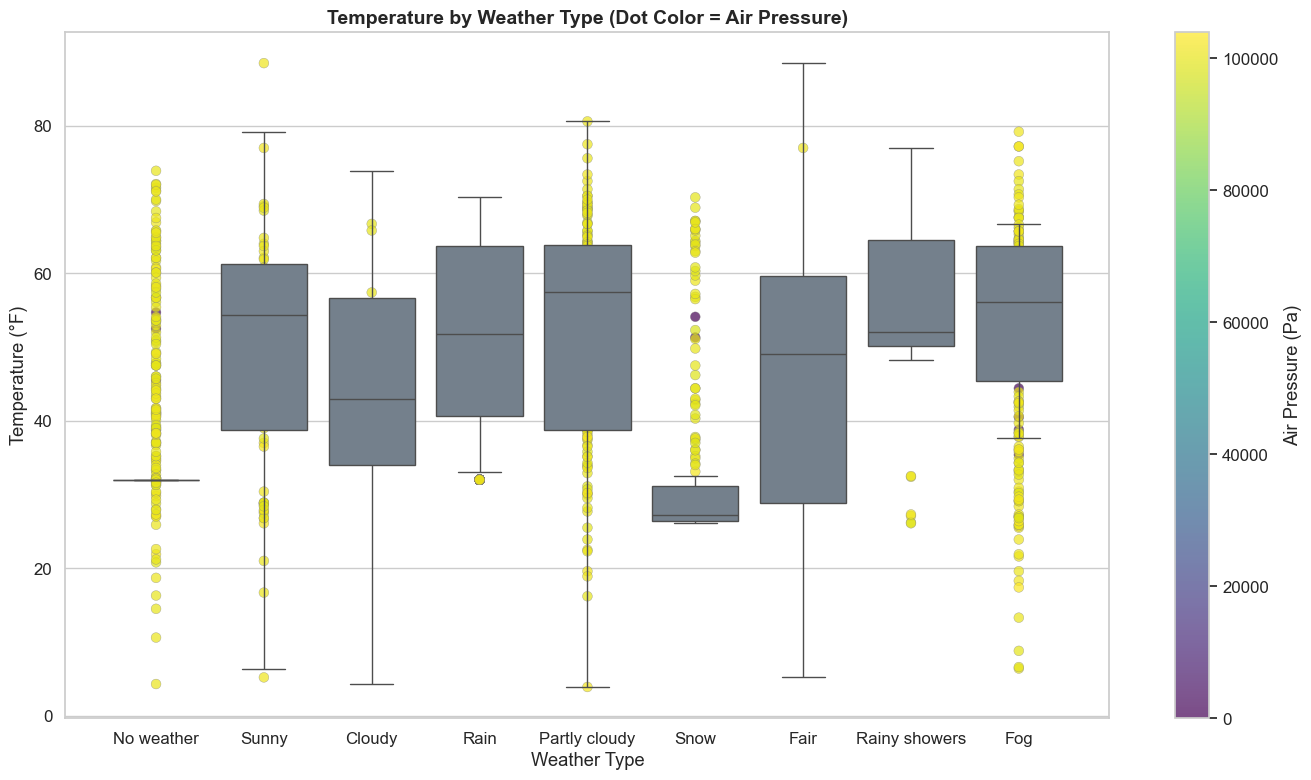

In [12]:
# Set seaborn style and figure size
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14, 8))

# Draw boxplot
ax = sns.boxplot(data=df, x='Weather type', y='Weather temperature (°F)', fliersize=0, color='#708090')

# Draw colored dots by air pressure using matplotlib
scatter = plt.scatter(
    x=df['Weather type'].astype('category').cat.codes,
    y=df['Weather temperature (°F)'],
    c=df['Air Pressure (Pa)'],
    cmap='viridis',  # More readable
    alpha=0.7,
    s=50,
    edgecolors='gray',
    linewidths=0.3
)

# Colorbar
plt.colorbar(scatter, ax=ax, label='Air Pressure (Pa)')

# Labels and formatting
ax.set_title('Temperature by Weather Type (Dot Color = Air Pressure)', fontsize=14, weight='bold')
ax.set_xlabel('Weather Type')
ax.set_ylabel('Temperature (°F)')
ax.set_xticks(ticks=range(len(df['Weather type'].unique())))
ax.set_xticklabels(df['Weather type'].unique(), rotation=0)

plt.tight_layout()
plt.show()

### ⏱️ Converting Time Columns from Seconds to Hours

Several time-related columns in the dataset were originally recorded in seconds. To make the data more interpretable and analysis-ready, these columns were converted to hours and renamed accordingly.

#### 🛠 Columns Converted:

- `Awake (seconds)`
- `Time in bed (seconds)`
- `Time asleep (seconds)`
- `Time before sleep (seconds)`
- `Snore time (seconds)`

#### 🔄 What Was Done:

- Each column was divided by `3600` to convert seconds to hours  
- Values were rounded to 1 decimal place for clarity  
- Column names were updated to remove the `" (seconds)"` suffix

#### ✅ Code Used:

```python
seconds_cols = [
    'Awake (seconds)',
    'Time in bed (seconds)',
    'Time asleep (seconds)',
    'Time before sleep (seconds)',
    'Snore time (seconds)'
]

df[seconds_cols] = (df[seconds_cols] / 3600).round(1)
df.rename(columns={col: col.replace(' (seconds)', '') for col in seconds_cols}, inplace=True)

In [13]:
# List of columns to convert
seconds_cols = [
    'Awake (seconds)',
    'Time in bed (seconds)',
    'Time asleep (seconds)',
    'Time before sleep (seconds)',
    'Snore time (seconds)'
]

# Convert seconds to hours, round to 1 decimal, and rename columns
df[seconds_cols] = (df[seconds_cols] / 3600).round(1)
df.rename(columns={col: col.replace(' (seconds)', '') for col in seconds_cols}, inplace=True)

### 🧹 Dropping Unreliable or Irrelevant Columns

The following columns were removed from the dataset due to one or more of the following reasons:

- ❌ High percentage of missing values (e.g., > 80%)
- 🚫 Contain preset or constant values that do not vary
- ⚠️ Represent inferred or non-sensor-based metrics (e.g., sleep stage estimations)
- 🧪 Include unreliable or unrealistic values

#### 🔻 Columns Removed:

- `Window start`, `Window stop`: Static values with ~88% missing  
- `Body temperature deviation (degrees Celsius)`: Completely missing (100%)  
- `Dream (seconds)`, `Light (seconds)`, `Deep (seconds)`: Inferred, not sensor-verified  
- `Heart rate (bpm)`: Inferred value, not a direct sensor measurement  
- `Alarm mode`: Constant or preset value with no analytical value  
- `Air Pressure (Pa)`: Inconsistent and unrealistic values across rows  

These columns were dropped using:

```python
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
# List of columns to be remove from the DataFrame
columns_to_drop = [
    'Window start', # Preset value, not informative + 88% missing
    'Window stop', # Preset value, not informative + 88% missing
    'Body temperature deviation (degrees Celsius)', # 100% missing
    'Dream (seconds)', # The 'Dream' column doesn't capture actual dreams — it's an inferred metric and not sensor-verified
    'Light (seconds)', # The 'Light' column doesn't capture actual light sleep — it's an inferred metric and not sensor-verified 
    'Deep (seconds)', # The 'Deep' column doesn't capture actual deep sleep — it's an inferred metric and not sensor-verified
    'Heart rate (bpm)', # The 'Heart rate' column doesn't capture actual heart rate — it's an inferred metric and not sensor-verified
    'Alarm mode', # Preset value, not informative.    
    'Air Pressure (Pa)' # # Drop Air Pressure (Pa) column due to inconsistent and unrealistic values
]
# Drop the selected columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

### 💾 Saving the Cleaned Dataset

After completing the cleaning and preprocessing steps, the final version of the dataset was saved as a CSV file for future analysis or sharing.

- The file is saved without the index column to keep the CSV clean and compact.
- It is stored in the `/data/processed/` directory within the project structure.

#### ✅ Code Used:

```python
# Save the cleaned DataFrame to a CSV file without the index column
df.to_csv("/Users/saayedalam/Documents/Career/data_portfolio/sleep_cycle_analysis/data/processed/sleepcycle_clean.csv", index=False)

In [16]:
# Save the cleaned DataFrame to a CSV file without the index column
df.to_csv("/Users/saayedalam/Documents/Career/data_portfolio/sleep_cycle_analysis/data/processed/sleepcycle_clean.csv", index=False)

In [15]:
df.head()

,Start,End,Sleep Quality,Regularity,Awake,Mood,Steps,City,Movements per hour,Time in bed,Time asleep,Time before sleep,Snore time,Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,1.5,NaN,15495,NaN,51.3,7.6,6.1,0.4,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,0.6,NaN,13631,NaN,120.9,6.7,6.1,0.1,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,1.5,NaN,13016,NaN,85.1,7.5,6.0,0.1,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,0.5,NaN,10987,NaN,69.0,7.7,7.2,0.2,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,0.4,NaN,9051,NaN,60.1,6.9,6.5,0.1,0.0,32.0,No weather,NaN
